In [1]:
!nvidia-smi

Sat Aug 24 13:23:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 781.3 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

In [3]:
!pip install kaggle

Mount google drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Setup kaggle credentials and permissions

In [5]:
!mkdir ~/.kaggle

In [6]:
!cp /content/drive/MyDrive/kaggle_API/kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download andrewmvd/face-mask-detection

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection
License(s): CC0-1.0
 97% 387M/398M [00:06<00:00, 69.2MB/s]
100% 398M/398M [00:07<00:00, 59.4MB/s]


In [9]:
!unzip face-mask-detection.zip

Archive:  face-mask-detection.zip
  inflating: annotations/maksssksksss0.xml  
  inflating: annotations/maksssksksss1.xml  
  inflating: annotations/maksssksksss10.xml  
  inflating: annotations/maksssksksss100.xml  
  inflating: annotations/maksssksksss101.xml  
  inflating: annotations/maksssksksss102.xml  
  inflating: annotations/maksssksksss103.xml  
  inflating: annotations/maksssksksss104.xml  
  inflating: annotations/maksssksksss105.xml  
  inflating: annotations/maksssksksss106.xml  
  inflating: annotations/maksssksksss107.xml  
  inflating: annotations/maksssksksss108.xml  
  inflating: annotations/maksssksksss109.xml  
  inflating: annotations/maksssksksss11.xml  
  inflating: annotations/maksssksksss110.xml  
  inflating: annotations/maksssksksss111.xml  
  inflating: annotations/maksssksksss112.xml  
  inflating: annotations/maksssksksss113.xml  
  inflating: annotations/maksssksksss114.xml  
  inflating: annotations/maksssksksss115.xml  
  inflating: annotations/maksssk

In [10]:
import os
import pandas as pd

In [11]:
images_paths = "images/"
annotations_path = "annotations/"

In [12]:
image_names = os.listdir(images_paths)
annotation_names = os.listdir(annotations_path)

In [13]:
print(image_names[:5])
print(annotation_names[:5])

['maksssksksss513.png', 'maksssksksss623.png', 'maksssksksss742.png', 'maksssksksss423.png', 'maksssksksss783.png']
['maksssksksss443.xml', 'maksssksksss492.xml', 'maksssksksss520.xml', 'maksssksksss131.xml', 'maksssksksss323.xml']


In [14]:
len(annotation_names) == len(image_names)

True

In [15]:
images_data = pd.DataFrame(pd.Series([images_paths + i for i in image_names], name='path'))

In [16]:
images_data.head()

,path
0,images/maksssksksss513.png
1,images/maksssksksss623.png
2,images/maksssksksss742.png
3,images/maksssksksss423.png
4,images/maksssksksss783.png


In [17]:
images_data['path'].iloc[0]

'images/maksssksksss513.png'

In [18]:
images_data['id'] = images_data['path'].apply(lambda x: int(x.split('/')[-1].split('.')[0].removeprefix('maksssksksss')))

DataFrame creation

In [19]:
images_data = images_data[['id', 'path']]

images_data.head()

,id,path
0,513,images/maksssksksss513.png
1,623,images/maksssksksss623.png
2,742,images/maksssksksss742.png
3,423,images/maksssksksss423.png
4,783,images/maksssksksss783.png


In [20]:
images_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      853 non-null    int64 
 1   path    853 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.5+ KB


Parsing annotations using ElementTree

In [21]:
import xml.etree.ElementTree as ET

def get_xml_data(path):
    tree = ET.parse(path)
    root = tree.getroot()
    id = int(root[1].text.split('.')[0].removeprefix('maksssksksss'))
    width = int(root[2][0].text)
    height = int(root[2][1].text)
    depth = int(root[2][2].text)
    segmented = int(root[3].text)

    records = []

    for i in root[4:]:
        record = {
            'file_id': id,
            'width': width,
            'height': height,
            'depth': depth,
            'segmented': segmented,
            'class': i[0].text,
            'pose': i[1].text,
            'truncated': int(i[2].text),
            'occluded': int(i[3].text),
            'difficult': int(i[4].text),
            'xmin': int(i[5][0].text),
            'ymin': int(i[5][1].text),
            'xmax': int(i[5][2].text),
            'ymax': int(i[5][3].text)
        }
        records.append(record)

    return records

In [22]:
annotations_data = []
for i in annotation_names:
    annotations_data.extend(get_xml_data(annotations_path + i))

annotations_data = pd.DataFrame(annotations_data)

In [23]:
annotations_data

,file_id,width,height,depth,segmented,class,pose,truncated,occluded,difficult,xmin,ymin,xmax,ymax
0,443,301,400,3,0,without_mask,Unspecified,0,0,0,89,155,187,264
1,492,301,400,3,0,with_mask,Unspecified,0,0,0,60,154,161,278
2,520,301,400,3,0,with_mask,Unspecified,0,0,0,42,173,154,304
3,131,400,267,3,0,with_mask,Unspecified,0,0,0,65,63,110,112
4,131,400,267,3,0,with_mask,Unspecified,0,0,0,127,31,166,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,698,400,333,3,0,mask_weared_incorrect,Unspecified,0,0,0,1,136,37,182
4068,698,400,333,3,0,mask_weared_incorrect,Unspecified,0,0,0,317,214,353,248
4069,698,400,333,3,0,mask_weared_incorrect,Unspecified,0,0,0,275,61,318,107
4070,698,400,333,3,0,without_mask,Unspecified,0,0,0,28,109,55,147


In [24]:
data = pd.merge(images_data, annotations_data, left_on='id', right_on='file_id', how='inner')

data

,id,path,file_id,width,height,depth,segmented,class,pose,truncated,occluded,difficult,xmin,ymin,xmax,ymax
0,513,images/maksssksksss513.png,513,267,400,3,0,with_mask,Unspecified,0,0,0,75,45,106,83
1,513,images/maksssksksss513.png,513,267,400,3,0,with_mask,Unspecified,0,0,0,112,39,140,68
2,513,images/maksssksksss513.png,513,267,400,3,0,with_mask,Unspecified,0,0,0,184,49,213,80
3,623,images/maksssksksss623.png,623,400,245,3,0,with_mask,Unspecified,0,0,0,4,202,30,230
4,623,images/maksssksksss623.png,623,400,245,3,0,with_mask,Unspecified,0,0,0,38,179,64,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,253,images/maksssksksss253.png,253,400,300,3,0,without_mask,Unspecified,0,0,0,155,83,172,103
4068,253,images/maksssksksss253.png,253,400,300,3,0,without_mask,Unspecified,0,0,0,32,57,49,89
4069,253,images/maksssksksss253.png,253,400,300,3,0,without_mask,Unspecified,0,0,0,385,77,400,93
4070,852,images/maksssksksss852.png,852,267,400,3,0,with_mask,Unspecified,0,0,0,139,94,198,147


In [25]:
data.drop(columns=['depth', 'segmented', 'pose', 'truncated', 'difficult'], inplace=True)

In [26]:
data

,id,path,file_id,width,height,class,occluded,xmin,ymin,xmax,ymax
0,513,images/maksssksksss513.png,513,267,400,with_mask,0,75,45,106,83
1,513,images/maksssksksss513.png,513,267,400,with_mask,0,112,39,140,68
2,513,images/maksssksksss513.png,513,267,400,with_mask,0,184,49,213,80
3,623,images/maksssksksss623.png,623,400,245,with_mask,0,4,202,30,230
4,623,images/maksssksksss623.png,623,400,245,with_mask,0,38,179,64,206
...,...,...,...,...,...,...,...,...,...,...,...
4067,253,images/maksssksksss253.png,253,400,300,without_mask,0,155,83,172,103
4068,253,images/maksssksksss253.png,253,400,300,without_mask,0,32,57,49,89
4069,253,images/maksssksksss253.png,253,400,300,without_mask,0,385,77,400,93
4070,852,images/maksssksksss852.png,852,267,400,with_mask,0,139,94,198,147


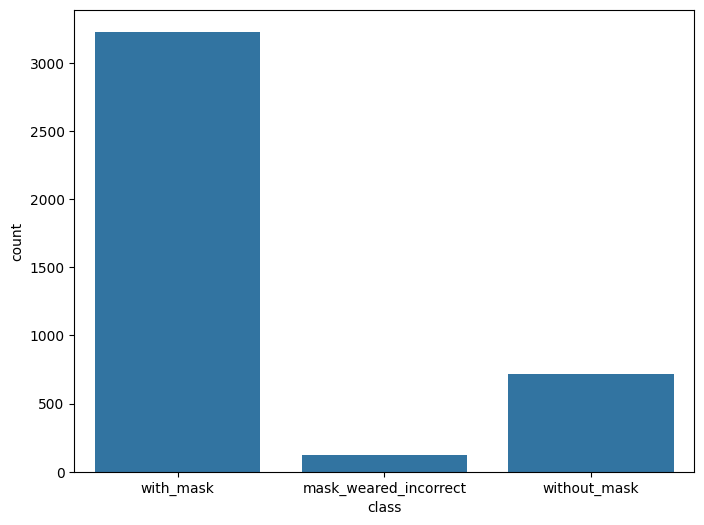

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data, x='class')
plt.show()

Display images by id

In [28]:
import matplotlib.patches as patches

def display_image(image_id):
    # Filter the data to get only the rows where 'id' matches the provided image_id
    data_to_plot = data[data['id'] == image_id]

    # Create a new figure and axes for the plot
    fig, ax = plt.subplots()

    # Remove the grid and axis labels for a cleaner image display
    plt.grid(False)
    plt.axis(False)

    # Read and display the image using the file path from the data
    plt.imshow(plt.imread(data_to_plot['path'].iloc[0]))

    # Iterate over each row in the filtered data to draw bounding boxes
    for _, row in data_to_plot.iterrows():
        # Get the starting coordinates (top-left corner) of the bounding box
        x, y = row['xmin'], row['ymin']

        # Calculate the width and height of the bounding box
        width, height = row['xmax'] - row['xmin'], row['ymax'] - row['ymin']

        # Determine the color of the bounding box based on the object's class
        color = ('r' if row['class'] == 'without_mask' else
                 'g' if row['class'] == 'with_mask' else
                 'b')

        # Create a rectangle patch for the bounding box and add it to the plot
        rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor=color, facecolor='none')
        ax.add_patch(rect)

    # Adding a legend to the plot
    colors = {
        'without_mask': 'r',  # Red color for 'without_mask'
        'with_mask': 'g',     # Green color for 'with_mask'
        'mask_weared_incorrectly': 'b'  # Blue color for 'mask_weared_incorrectly'
    }

    # Create legend patches for each class with corresponding colors
    legend_patches = [patches.Patch(color=color, label=label) for label, color in colors.items()]

    # Add the legend to the plot, positioned at the lower-right corner
    ax.legend(handles=legend_patches, loc='lower right', fontsize='xx-small')

    # Display the final plot with the image, bounding boxes, and legend
    plt.show()

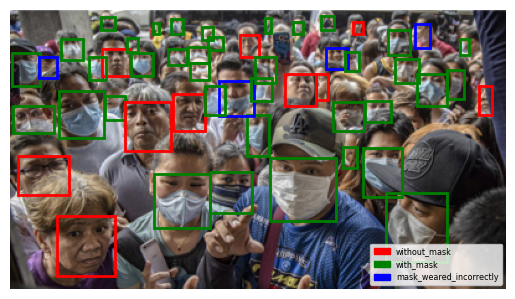

In [29]:
display_image(52)

In [30]:
def xml_to_yolo_bndbox(bbox, w, h):
    # Calculate the center of the bounding box in normalized coordinates
    x_center = ((bbox[2] + bbox[0]) / 2) / w  # (xmax + xmin) / 2 normalized by width
    y_center = ((bbox[3] + bbox[1]) / 2) / h  # (ymax + ymin) / 2 normalized by height

    # Calculate the width and height of the bounding box in normalized coordinates
    width = (bbox[2] - bbox[0]) / w  # (xmax - xmin) normalized by width
    height = (bbox[3] - bbox[1]) / h  # (ymax - ymin) normalized by height

    # Return the bounding box in YOLO format: [x_center, y_center, width, height]
    return [x_center, y_center, width, height]

def yolo_to_xml_bndbox(bbox, w, h):
    # Calculate half the width and height of the bounding box in pixel values
    w_half_len = (bbox[2] * w) / 2  # Half of the bounding box width in pixels
    h_half_len = (bbox[3] * h) / 2  # Half of the bounding box height in pixels

    # Calculate the top-left corner (xmin, ymin) of the bounding box
    xmin = int((bbox[0] * w) - w_half_len)  # x_center * width - half the width
    ymin = int((bbox[1] * h) - h_half_len)  # y_center * height - half the height

    # Calculate the bottom-right corner (xmax, ymax) of the bounding box
    xmax = int((bbox[0] * w) + w_half_len)  # x_center * width + half the width
    ymax = int((bbox[1] * h) + h_half_len)  # y_center * height + half the height

    # Return the bounding box in XML format: [xmin, ymin, xmax, ymax]
    return [xmin, ymin, xmax, ymax]

In [32]:
# Create a directory named "labels" if it doesn't already exist
# The directory will store annotation files as .txt files
os.makedirs("labels", exist_ok=True)

def convert_xml_txt(path):
    # Define a dictionary to map class names to numerical labels
    classes = {
        "without_mask": 0,  # "without_mask" class is labeled as 0
        "with_mask": 1,     # "with_mask" class is labeled as 1
        "mask_weared_incorrect": 2  # "mask_weared_incorrect" class is labeled as 2
    }

    # Parse the XML file at the given path
    tree = ET.parse(path)
    # Get the root element of the XML tree
    root = tree.getroot()

    # Find the size element and extract the width and height of the image
    size = root.find('size')
    width = int(size.find('width').text)  # Convert the width value to an integer
    height = int(size.find('height').text)  # Convert the height value to an integer

    # Create the output file name by replacing the original file extension with ".txt"
    file_name = '.'.join([root[1].text.split('.')[0], 'txt'])

    # Find all "object" elements in the XML and store them in a list
    # Object elements contain information about annotated objects in the image,
    # such as class labels and bounding box coordinates.
    objects = [i for i in root.findall('object')]

    # Initialize an empty list to store the converted data suitable for YOLO
    output = []

    # Iterate over each object found in the XML
    for i in objects:
        data = []  # Initialize an empty list to hold the data for this object

        # Append the class label (from the classes dictionary) corresponding to the object
        data.append(classes[i[0].text])
        # Extract the bounding box coordinates and convert them to integers
        coords = [int(j.text) for j in i.find('bndbox')]
        # Convert the XML bounding box format to YOLO format
        coords = xml_to_yolo_bndbox(coords, width, height)
        # Append the converted coordinates to the data list
        data = data + coords

        # Append the data for this object to the output list
        output.append(data)

    # Return the output file name and the list of converted data
    return (file_name, output)

In [34]:
x = convert_xml_txt('annotations/maksssksksss0.xml')

In [35]:
x

('maksssksksss0.txt',
 [[0, 0.18359375, 0.337431693989071, 0.05859375, 0.10109289617486339],
  [1, 0.4013671875, 0.3333333333333333, 0.080078125, 0.12021857923497267],
  [0, 0.6689453125, 0.3155737704918033, 0.068359375, 0.13934426229508196]])

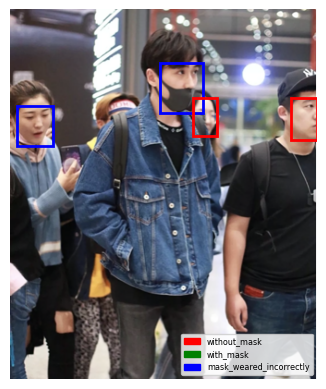

In [36]:
display_image(130)

Convet all the xml files to the YOLO format

In [37]:
for a in annotation_names:
    x = convert_xml_txt(annotations_path + a)
    with open('labels/' + x[0], 'w') as f:
        objects = x[1]
        f.write('\n'.join([' '.join([str(j) for j in i]) for i in objects]))

Split data into train, validation and test sets

In [38]:
os.makedirs('modeling/', exist_ok=True)

# here we store the train images with it's labels
os.makedirs('modeling/train', exist_ok=True)
os.makedirs('modeling/train/images', exist_ok=True)
os.makedirs('modeling/train/labels', exist_ok=True)

# here we store the validation images with it's labels
os.makedirs('modeling/validation', exist_ok=True)
os.makedirs('modeling/validation/images', exist_ok=True)
os.makedirs('modeling/validation/labels', exist_ok=True)

# here we store the test images with it's labels
os.makedirs('modeling/test', exist_ok=True)
os.makedirs('modeling/test/images', exist_ok=True)
os.makedirs('modeling/test/labels', exist_ok=True)

In [39]:
full_data = pd.DataFrame(pd.Series([images_paths + i for i in image_names], name='img_path'))
full_data['label_path'] = full_data['img_path'].apply(lambda x: "labels/" + x.split('/')[-1].split('.')[0] + '.txt')

full_data

,img_path,label_path
0,images/maksssksksss513.png,labels/maksssksksss513.txt
1,images/maksssksksss623.png,labels/maksssksksss623.txt
2,images/maksssksksss742.png,labels/maksssksksss742.txt
3,images/maksssksksss423.png,labels/maksssksksss423.txt
4,images/maksssksksss783.png,labels/maksssksksss783.txt
...,...,...
848,images/maksssksksss318.png,labels/maksssksksss318.txt
849,images/maksssksksss378.png,labels/maksssksksss378.txt
850,images/maksssksksss424.png,labels/maksssksksss424.txt
851,images/maksssksksss253.png,labels/maksssksksss253.txt


Split data

In [40]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(full_data, test_size=0.4, random_state=42)

val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [41]:
train_df

,img_path,label_path
693,images/maksssksksss606.png,labels/maksssksksss606.txt
529,images/maksssksksss445.png,labels/maksssksksss445.txt
94,images/maksssksksss118.png,labels/maksssksksss118.txt
11,images/maksssksksss748.png,labels/maksssksksss748.txt
396,images/maksssksksss116.png,labels/maksssksksss116.txt
...,...,...
71,images/maksssksksss85.png,labels/maksssksksss85.txt
106,images/maksssksksss706.png,labels/maksssksksss706.txt
270,images/maksssksksss733.png,labels/maksssksksss733.txt
435,images/maksssksksss301.png,labels/maksssksksss301.txt


In [42]:
val_df

,img_path,label_path
473,images/maksssksksss104.png,labels/maksssksksss104.txt
113,images/maksssksksss201.png,labels/maksssksksss201.txt
131,images/maksssksksss616.png,labels/maksssksksss616.txt
426,images/maksssksksss620.png,labels/maksssksksss620.txt
231,images/maksssksksss136.png,labels/maksssksksss136.txt
...,...,...
569,images/maksssksksss541.png,labels/maksssksksss541.txt
109,images/maksssksksss700.png,labels/maksssksksss700.txt
477,images/maksssksksss516.png,labels/maksssksksss516.txt
734,images/maksssksksss315.png,labels/maksssksksss315.txt


In [43]:
test_df

,img_path,label_path
500,images/maksssksksss599.png,labels/maksssksksss599.txt
851,images/maksssksksss253.png,labels/maksssksksss253.txt
286,images/maksssksksss841.png,labels/maksssksksss841.txt
467,images/maksssksksss821.png,labels/maksssksksss821.txt
215,images/maksssksksss682.png,labels/maksssksksss682.txt
...,...,...
444,images/maksssksksss749.png,labels/maksssksksss749.txt
409,images/maksssksksss686.png,labels/maksssksksss686.txt
813,images/maksssksksss762.png,labels/maksssksksss762.txt
445,images/maksssksksss655.png,labels/maksssksksss655.txt


Now we copy image and label files from their original locations to specific directories for training, testing, and validation purposes. The idea is that instead of moving the files (which would remove them from their original location), it's safer to copy them. This way, if something goes wrong or you need to re-import the dataset later, the original files remain intact.

In [47]:
import shutil

# copy train
for index, row in train_df.iterrows():
    img_src = row['img_path']
    img_dst = os.path.join("modeling/train/images/", os.path.basename(img_src))
    shutil.copy(img_src, img_dst)

    label_src = row['label_path']
    label_dst = os.path.join("modeling/train/labels/", os.path.basename(label_src))
    shutil.copy(label_src, label_dst)

# copy test
for index, row in test_df.iterrows():
    img_src = row['img_path']
    img_dst = os.path.join("modeling/test/images/", os.path.basename(img_src))
    shutil.copy(img_src, img_dst)

    label_src = row['label_path']
    label_dst = os.path.join("modeling/test/labels/", os.path.basename(label_src))
    shutil.copy(label_src, label_dst)

# copy validation
for index, row in val_df.iterrows():
    img_src = row['img_path']
    img_dst = os.path.join("modeling/validation/images/", os.path.basename(img_src))
    shutil.copy(img_src, img_dst)

    label_src = row['label_path']
    label_dst = os.path.join("modeling/validation/labels/", os.path.basename(label_src))
    shutil.copy(label_src, label_dst)

yaml is a file that contains the paths for the train and validation data along with the classes for the detection.

In [63]:
yaml_text = """
    train: /content/modeling/train/images
    val: /content/modeling/validation/images

    # number of classes is 3
    nc: 3
    # list of the names of the classes
    names: ["without_mask", "with_mask", "mask_weared_incorrect"]
"""

with open("/content/modeling/data.yaml", "w") as file:
    file.write(yaml_text)

Install YOLOv8

In [31]:
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 34.5/78.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.00GHz
CUDA                12.1

numpy               ✅ 1.26.4<2.0.0,>=1.23.0
matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.3.1+cu121>=1.8.0
torchvision         ✅ 0.18.1+cu121>=0.9.0
tqdm                ✅ 4.66.5>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.1.4>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 2.0.5>=2.0.0


In [50]:
os.makedirs("results", exist_ok=True)

Initiate the training process by providing the model path and the .yaml path

In [ ]:
%cd results

!pwd

In [64]:
!yolo task=detect mode=train model=yolov8n.pt data='../modeling/data.yaml' epochs=50 imgsz=640

[Errno 2] No such file or directory: 'results'
/content/results
Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=../modeling/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fal

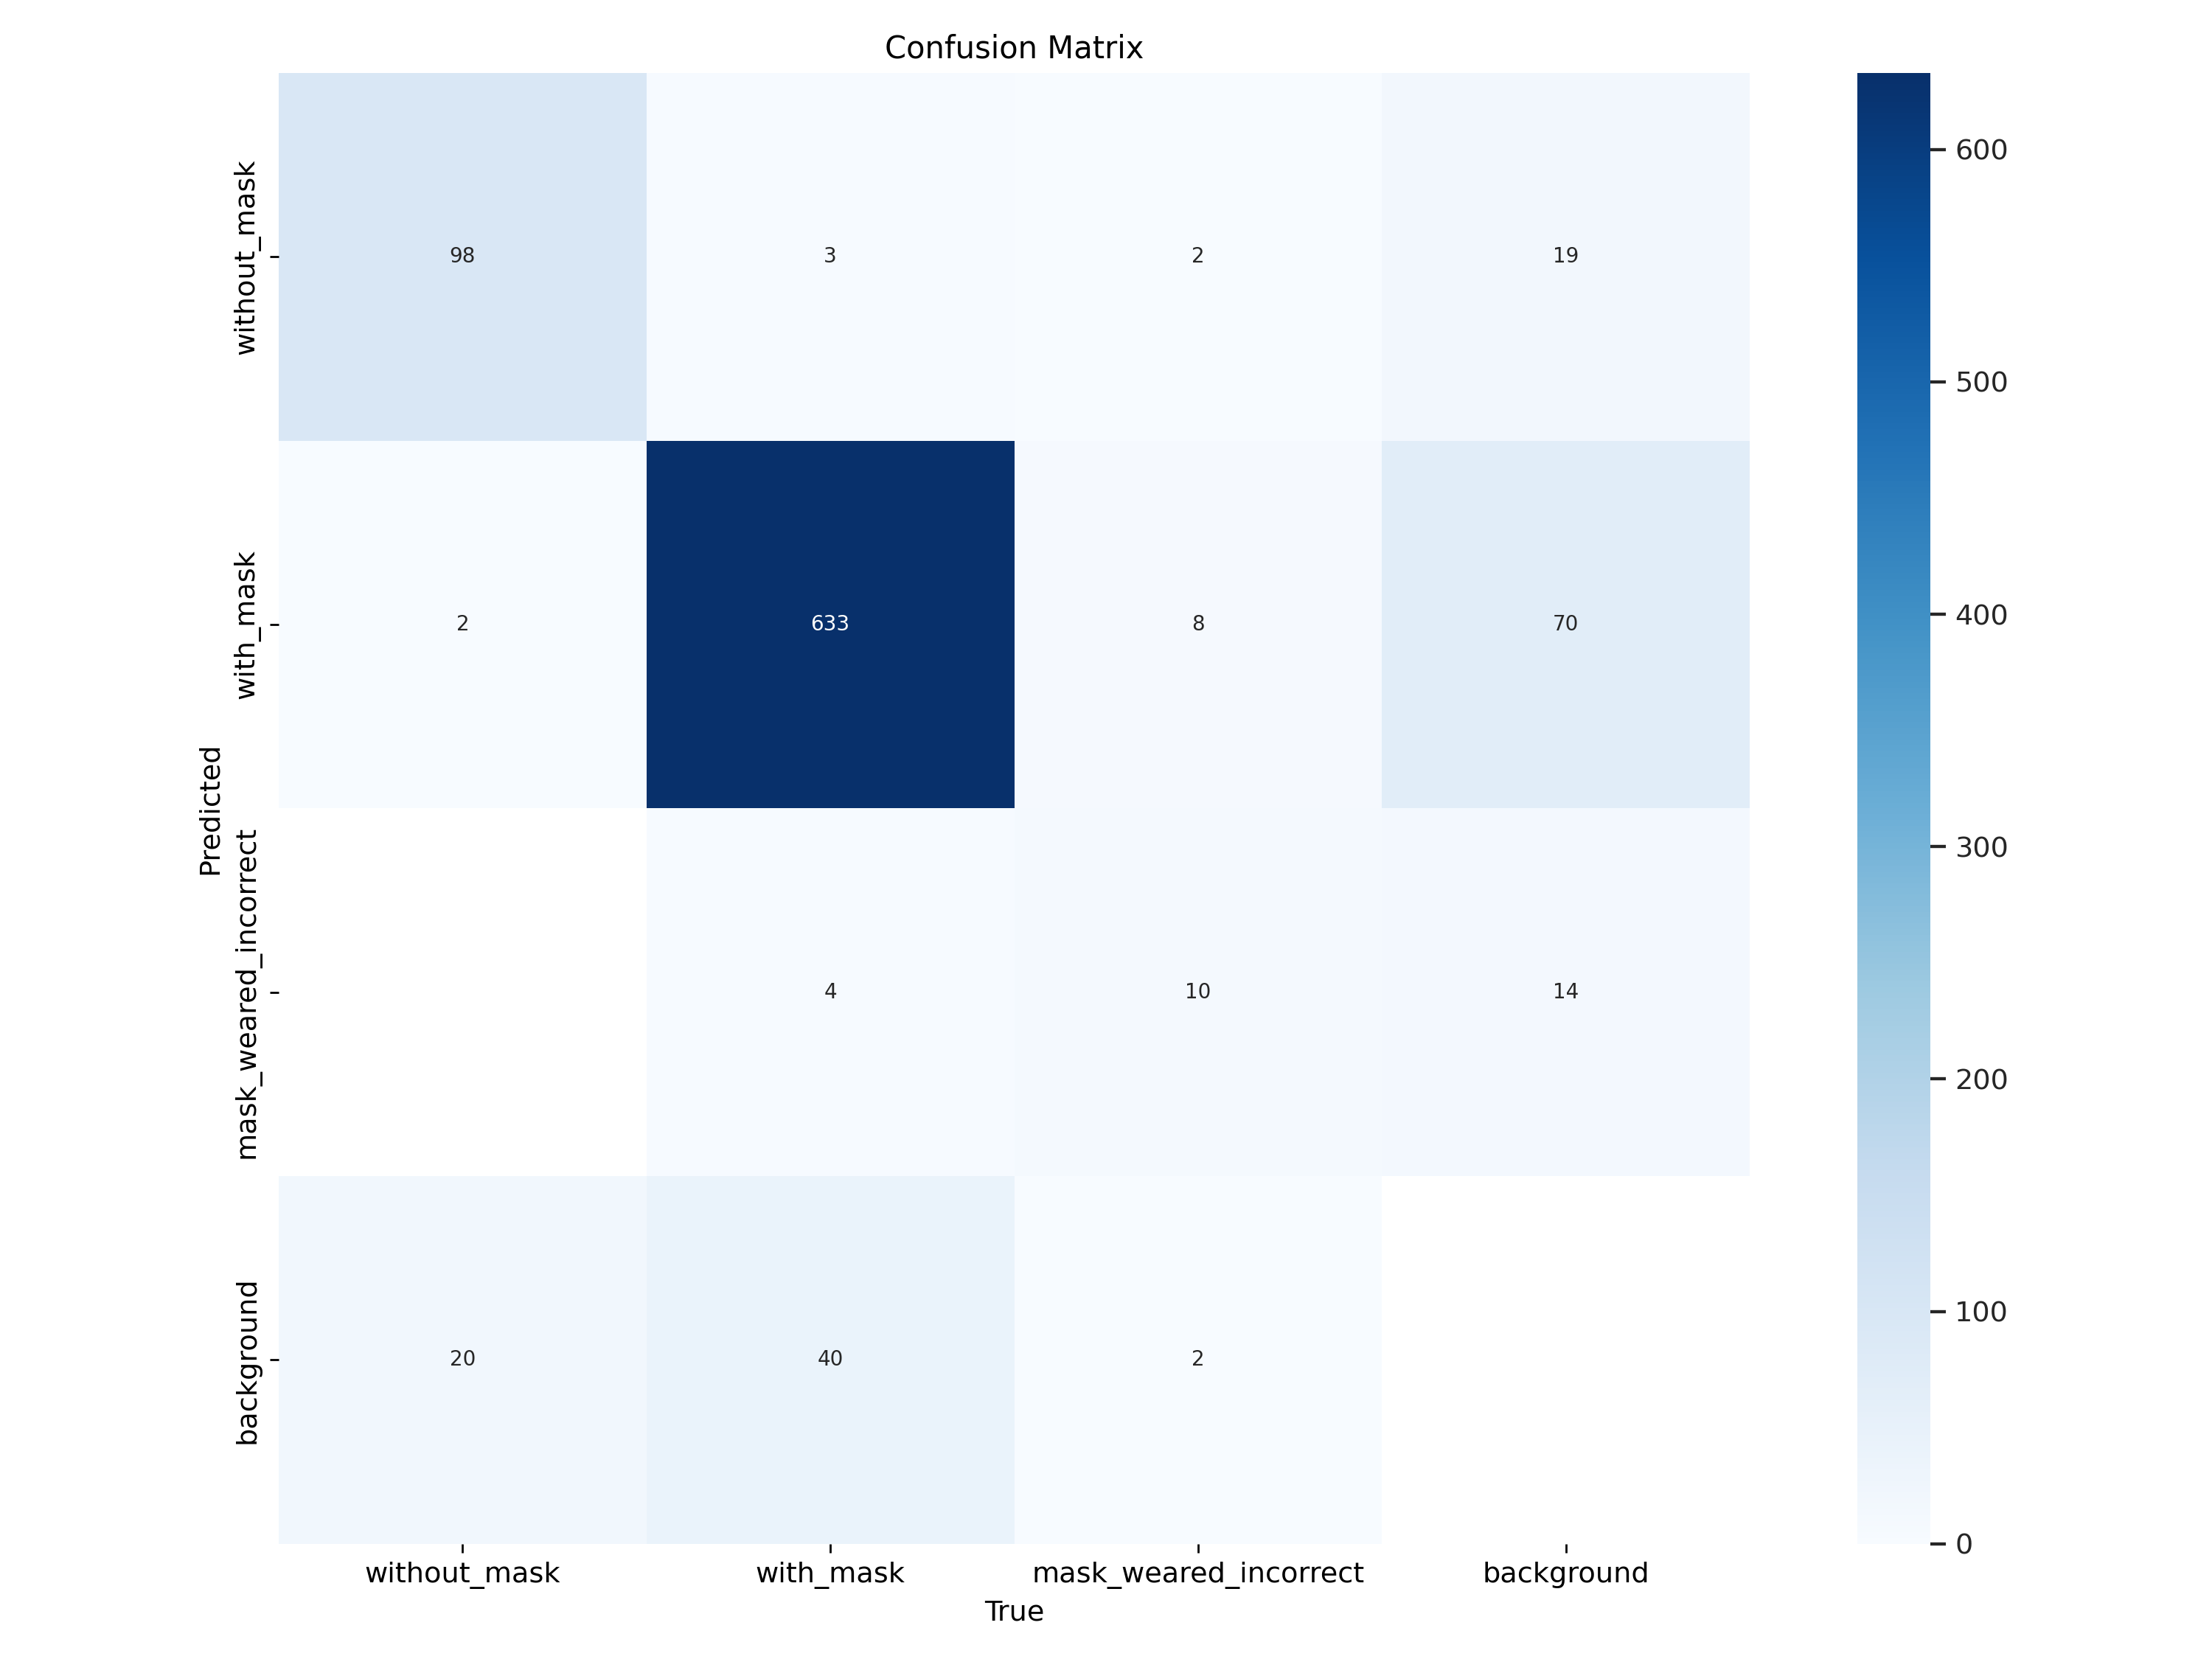

In [70]:
Image(filename=f'runs/detect/train7/confusion_matrix.png', width=600)

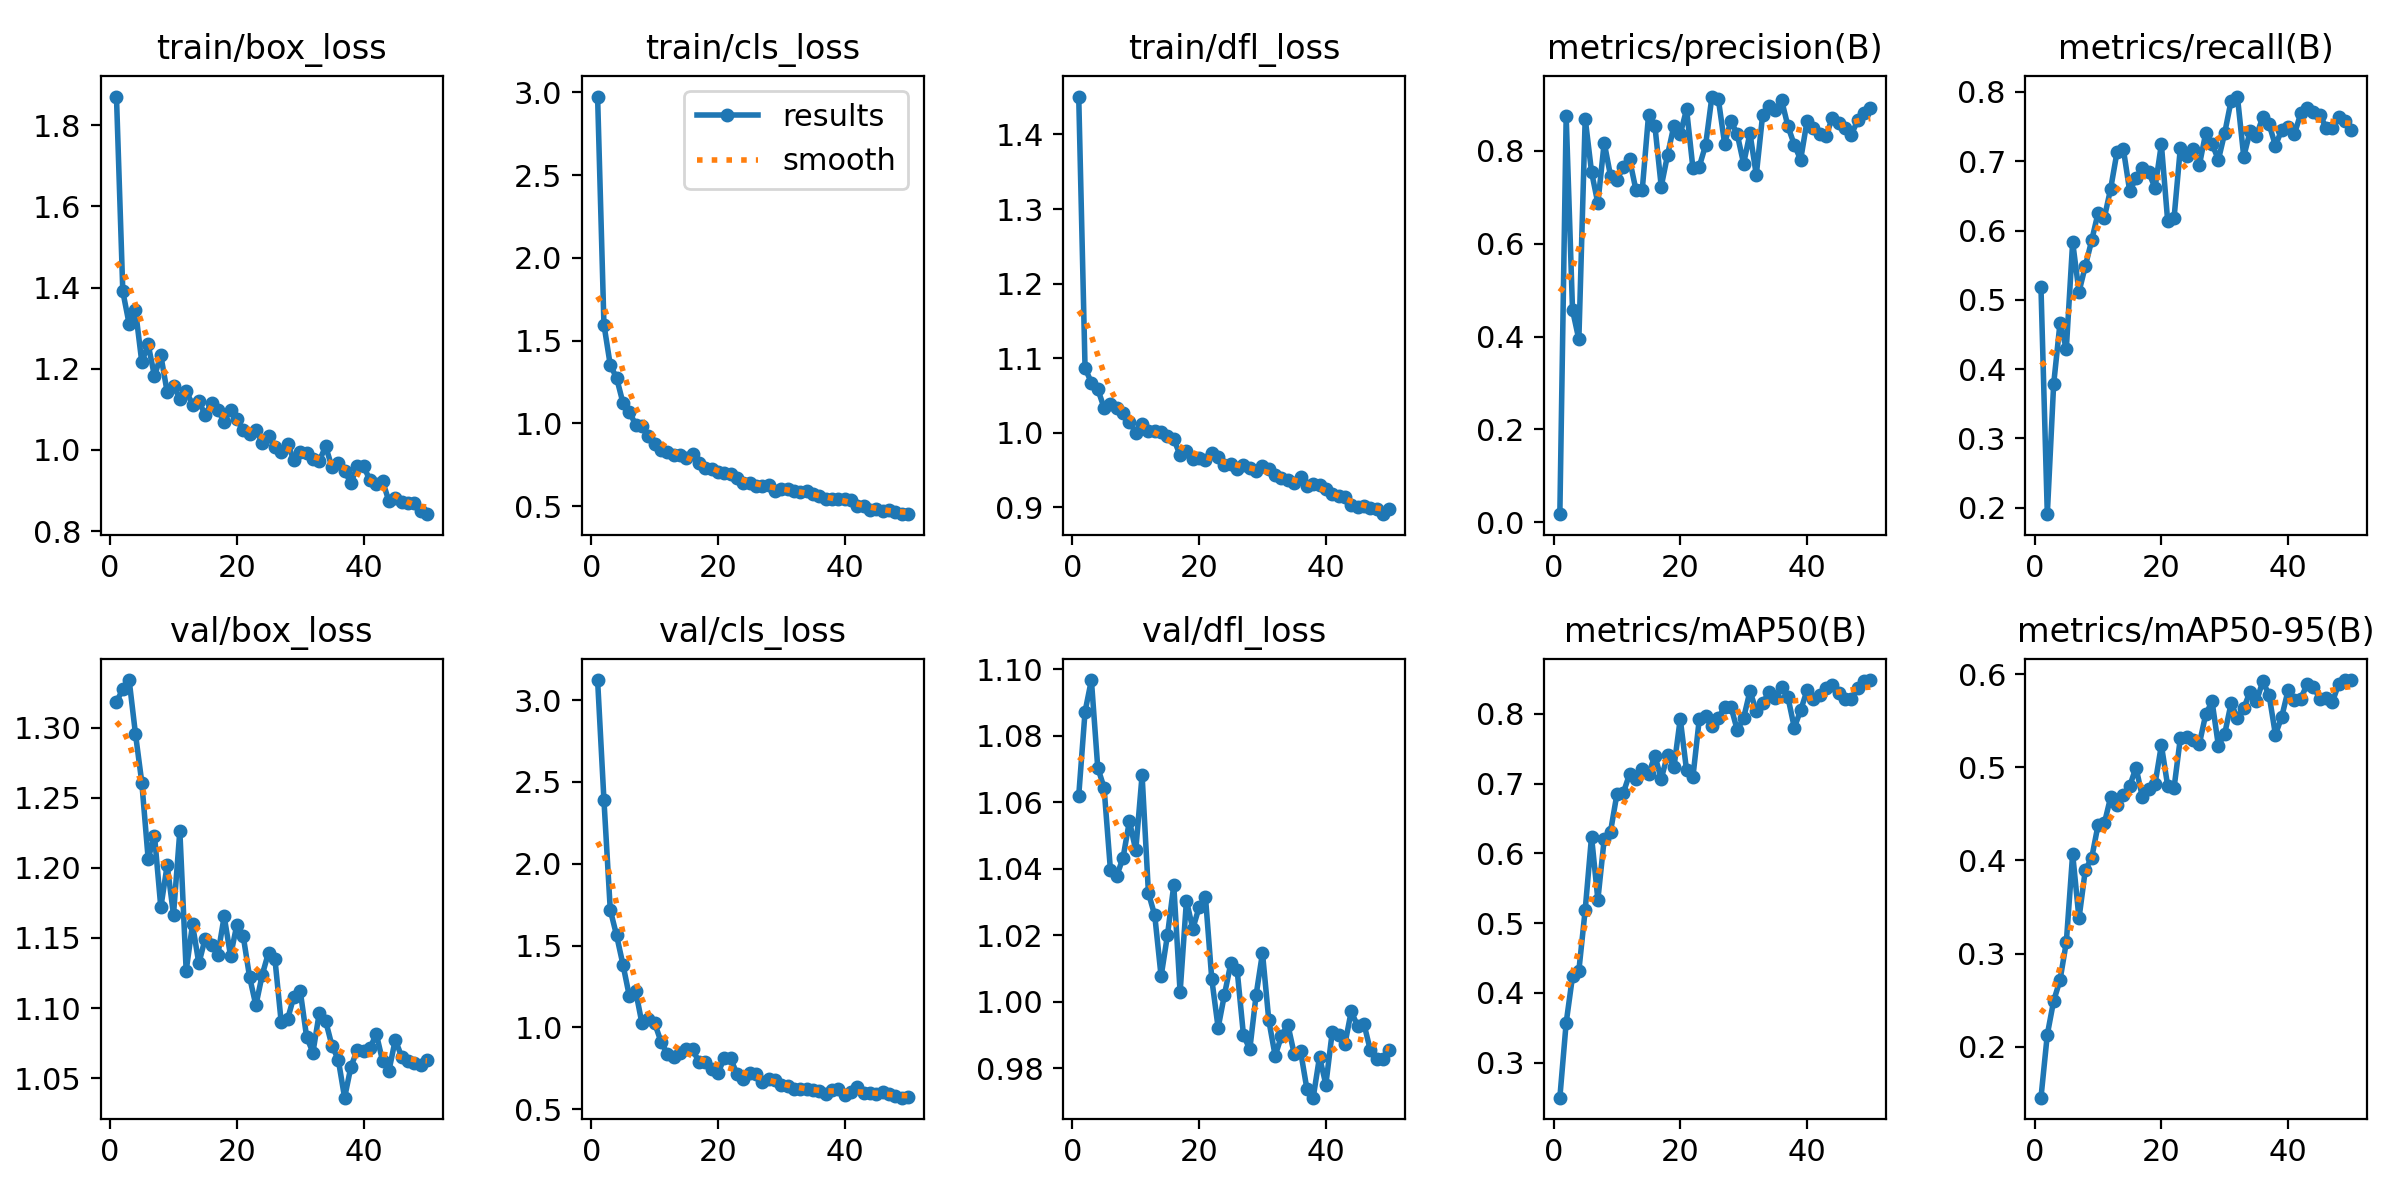

In [71]:
Image(filename=f'runs/detect/train7/results.png', width=600)

In [67]:
!yolo predict model=runs/detect/train7/weights/best.pt source='/content/modeling/test/images'

Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/171 /content/modeling/test/images/maksssksksss1.png: 256x640 1 without_mask, 7 with_masks, 110.1ms
image 2/171 /content/modeling/test/images/maksssksksss109.png: 640x640 1 with_mask, 13.8ms
image 3/171 /content/modeling/test/images/maksssksksss114.png: 384x640 1 without_mask, 1 with_mask, 93.7ms
image 4/171 /content/modeling/test/images/maksssksksss119.png: 480x640 2 without_masks, 5 with_masks, 95.2ms
image 5/171 /content/modeling/test/images/maksssksksss12.png: 448x640 1 without_mask, 15 with_masks, 102.7ms
image 6/171 /content/modeling/test/images/maksssksksss120.png: 640x512 1 with_mask, 101.1ms
image 7/171 /content/modeling/test/images/maksssksksss121.png: 480x640 7 without_masks, 10.5ms
image 8/171 /content/modeling/test/images/maksssksksss126.png: 640x448 2 with_masks, 97.3ms
image 9/171 /content/modeling